# <div style="text-align: center; background-color:skyblue; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Power Consumption of Tetouan City</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/power-consumption/Tetuan City power consumption.csv


# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
data=pd.read_csv('/kaggle/input/power-consumption/Tetuan City power consumption.csv')

In [3]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


# Data Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [8]:
# Checking unique values
for i in data.columns:
    print(i,':',data[i].nunique())

DateTime : 52416
Temperature : 3437
Humidity : 4443
Wind Speed : 548
general diffuse flows : 10504
diffuse flows : 10449
Zone 1 Power Consumption : 27709
Zone 2  Power Consumption : 29621
Zone 3  Power Consumption : 22838


In [9]:
# Checking null values
data.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

Cleaned data

# Convert datatype into dattime

In [10]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [11]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


Text(0, 0.5, 'Temperature')

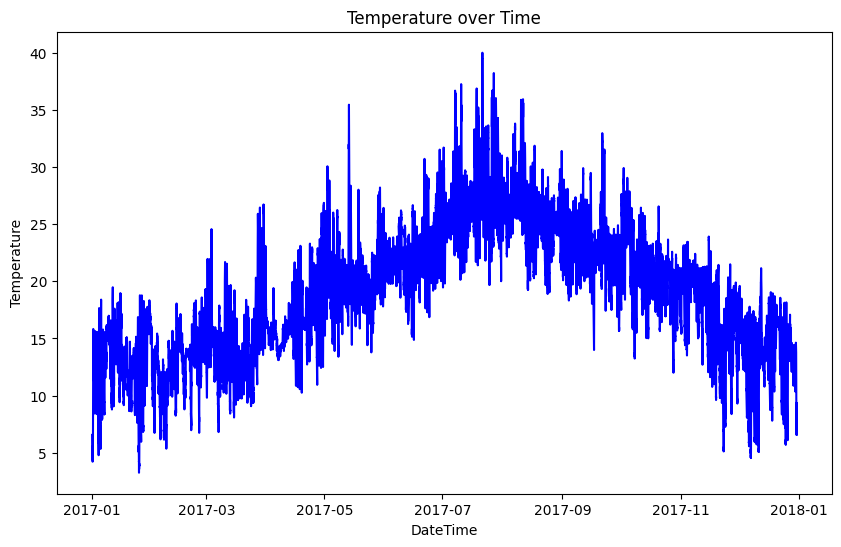

In [13]:
# Temperature
plt.figure(figsize=(10,6))
plt.plot(data['DateTime'], data['Temperature'], color='blue')
plt.title('Temperature over Time')
plt.xlabel('DateTime')
plt.ylabel('Temperature')


Text(0, 0.5, 'Humidity')

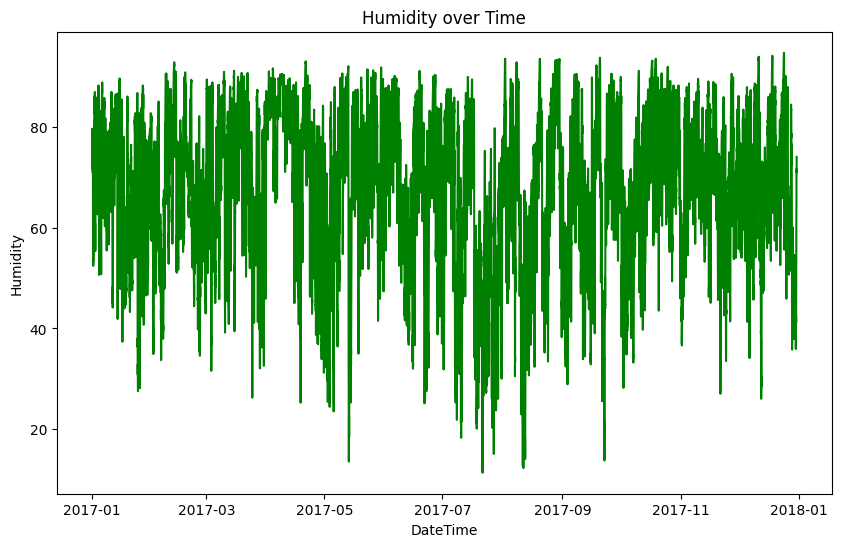

In [14]:
plt.figure(figsize=(10,6))
plt.plot(data['DateTime'], data['Humidity'], color='green')
plt.title('Humidity over Time')
plt.xlabel('DateTime')
plt.ylabel('Humidity')

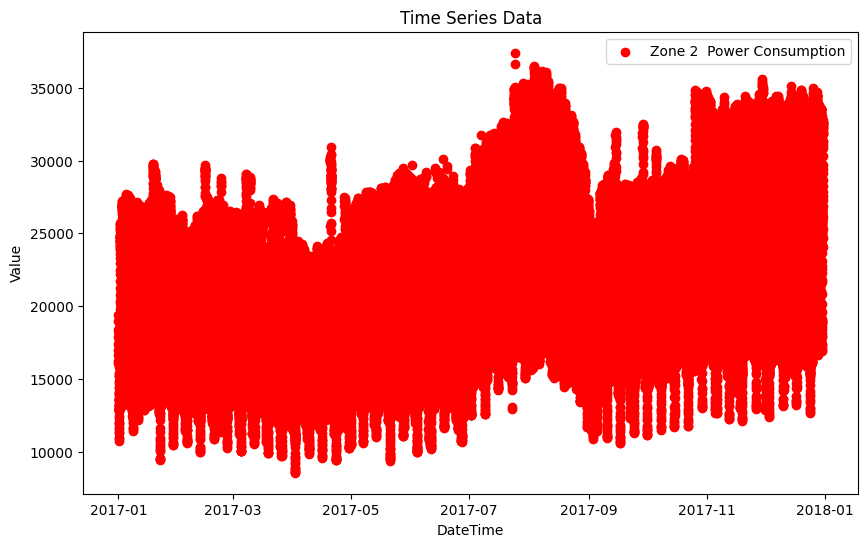

In [21]:
# Power Consumption 
plt.figure(figsize=(10,6))
plt.scatter(data['DateTime'], data['Zone 2  Power Consumption'], label='Zone 2  Power Consumption', color='red')

# Set labels and title
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.legend()

plt.show()

Text(0, 0.5, 'Power Consumption')

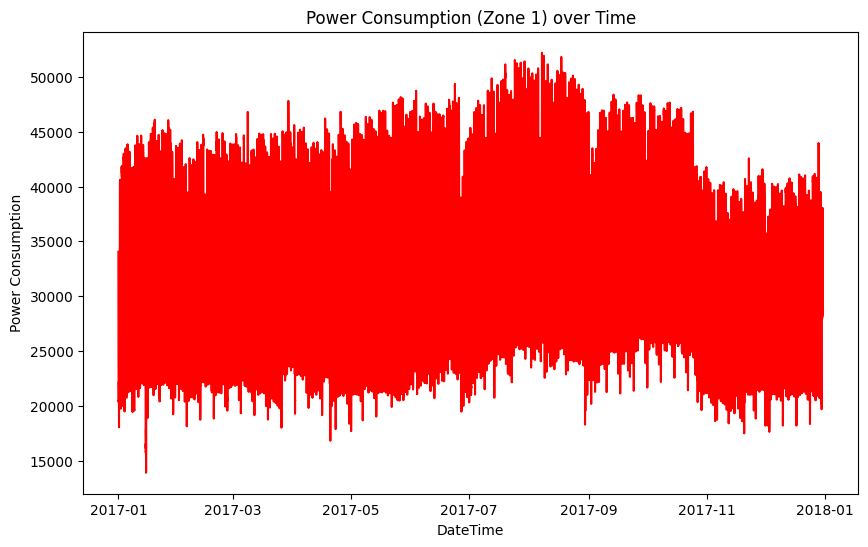

In [16]:
plt.figure(figsize=(10,6))
plt.plot(data['DateTime'], data['Zone 1 Power Consumption'], color='red')
plt.title('Power Consumption (Zone 1) over Time')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')


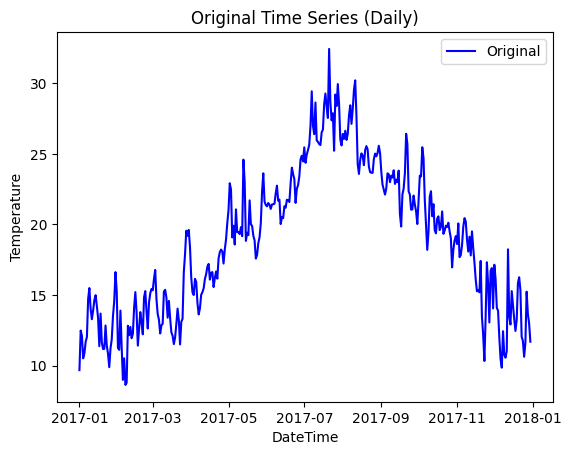

In [26]:
from statsmodels.tsa.seasonal import STL

# Assuming your DataFrame is named df and 'DateTime' is already in datetime format
variable_of_interest = 'Temperature'
df_resampled = data.set_index('DateTime').resample('D').mean()

# Perform STL decomposition on the resampled data
stl_result = STL(df_resampled[variable_of_interest], seasonal=13).fit()

# Plot the original time series data
plt.plot(df_resampled.index, df_resampled[variable_of_interest], label='Original', color='blue')
plt.title('Original Time Series (Daily)')
plt.xlabel('DateTime')
plt.ylabel(variable_of_interest)
plt.legend()

In [38]:
df_resampled

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181
2017-01-02,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053
2017-01-03,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213
2017-01-04,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779
2017-01-05,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707
...,...,...,...,...,...,...,...,...
2017-12-26,11.621840,69.070903,0.083062,106.836687,50.760389,30013.476975,24757.006239,11395.678272
2017-12-27,15.232917,59.445903,0.082028,95.890674,41.705062,29966.962399,25057.481845,11498.279312
2017-12-28,13.662361,62.839375,0.081354,112.620160,30.209361,30267.004647,24585.251099,11167.026811


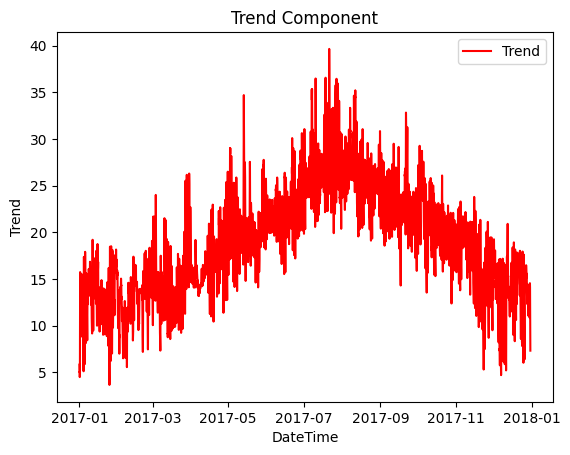

In [36]:
# Perform STL decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using seasonal_decompose
result = seasonal_decompose(data.set_index('DateTime')[variable_of_interest], model='additive', period=13)

plt.plot(data['DateTime'], result.trend, label='Trend', color='red')
plt.title('Trend Component')
plt.xlabel('DateTime')
plt.ylabel('Trend')
plt.legend()


In [37]:
result

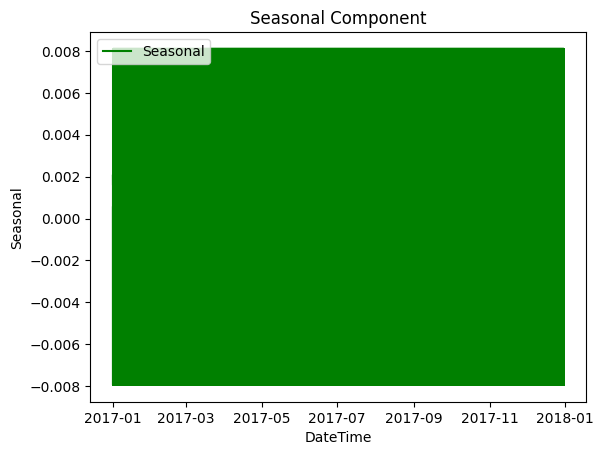

In [32]:
plt.plot(data['DateTime'], result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.xlabel('DateTime')
plt.ylabel('Seasonal')
plt.legend()

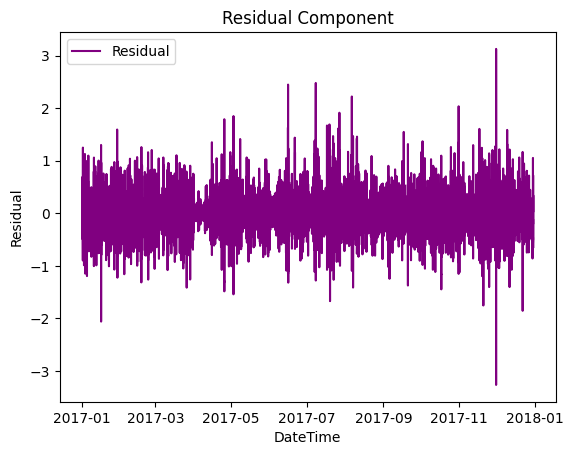

In [34]:
plt.plot(data['DateTime'], result.resid, label='Residual', color='purple')
plt.title('Residual Component')
plt.xlabel('DateTime')
plt.ylabel('Residual')
plt.legend()

# Model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [68]:
data

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [69]:
X = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'diffuse flows']]
y = data['Zone 3  Power Consumption']

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform the testing data
X_test_scaled = scaler.transform(X_test)


In [72]:
# Initialize the Linear Regression model
model = LinearRegression()
# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)


In [74]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Linear Regression):", mse)
r2_R = r2_score(y_test, y_pred)
print(f'R-squared: {r2_R:.4f}')

Mean Squared Error (Linear Regression): 3967.3793793880927
R-squared: 0.6390


# Random Forest Regressor

In [76]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [78]:
# Evaluate the model
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (Random Forest Regressor):", mse)
r2_R = r2_score(y_test, y_pred)
print(f'R-squared: {r2_R:.4f}')

Mean Squared Error (Random Forest Regressor): 1383.804762656904
R-squared: 0.9561
